In [1]:
import os
print(os.listdir("D:/RBC Thalassemia"))

['1 Elliptocyte 1211', '2 pencil 24', '3 teardrop 2076', '4 normal 1426', '5 stomatocyte 382', '6 TARGETSEL 851', '7 hypochromic 222', '8 SPERO bulat 562', '9 acantocyte 354', 'Thalassemia-Classification-CNN', 'venv']


In [2]:
# Ignore  the warnings
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

# data visualisation and manipulation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

#configure
# sets matplotlib to inline and displays graphs below the corressponding cell.
%matplotlib inline
style.use('fivethirtyeight')
sns.set(style='whitegrid',color_codes=True)

#model selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,roc_curve,roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder

#preprocess.
from keras.preprocessing.image import ImageDataGenerator

#dl libraraies
from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop
from keras.utils import to_categorical

# specifically for cnn
from keras.layers import Dropout, Flatten,Activation
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization

import tensorflow as tf
import random as rn

# specifically for manipulating zipped images and getting numpy arrays of pixel values of images.
import cv2
import numpy as np
from tqdm import tqdm
import os
from random import shuffle
from zipfile import ZipFile
from PIL import Image

In [8]:
X=[]
Z=[]
IMG_SIZE= 100
ACANTOCYTE_DIR='D:/RBC Thalassemia/9 acantocyte 354'
SPERO_DIR='D:/RBC Thalassemia/8 SPERO bulat 562'
HYPOCHROMIC_DIR='D:/RBC Thalassemia/7 hypochromic 222'
TARGET_DIR='D:/RBC Thalassemia/6 TARGETSEL 851'
STOMATOCYTE_DIR='D:/RBC Thalassemia/5 stomatocyte 382'
NORMAL_DIR='D:/RBC Thalassemia/4 normal 1426'
TEARDROP_DIR='D:/RBC Thalassemia/3 teardrop 2076'
PENCIL_DIR='D:/RBC Thalassemia/2 pencil 24'
ELLIPTOCYTE_DIR='D:/RBC Thalassemia/1 Elliptocyte 1211'

In [9]:
def assign_label(img,blood_type):
    return blood_type

In [10]:
from numpy.lib.type_check import imag
import cv2
import numpy as np
import random

In [11]:
#def make_train_data(blood_type,DIR):
#    for img in tqdm(os.listdir(DIR)):
#        label=assign_label(img,blood_type)
#        path = os.path.join(DIR,img)
#        img = cv2.imread(path,cv2.IMREAD_COLOR)
#        img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))
#
#        X.append(np.array(img))
#        Z.append(str(label))


def make_train_data(blood_type, DIR):
    for img in tqdm(os.listdir(DIR)):
        label = assign_label(img, blood_type)
        path = os.path.join(DIR, img)
        img = cv2.imread(path, cv2.IMREAD_COLOR)
        img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))

        X.append(np.array(img))
        Z.append(str(label))
        '''
        # Menerapkan augmentasi gambar
        augmented_image = img
        augmented_image_rot90 = rotate_90(augmented_image)
        augmented_image_rot180 = rotate_180(augmented_image)
        augmented_image_rot270 = rotate_270(augmented_image)

        X.append(np.array(augmented_image_rot90))
        Z.append(str(label))

        X.append(np.array(augmented_image_rot180))
        Z.append(str(label))

        X.append(np.array(augmented_image_rot270))
        Z.append(str(label))'''

In [12]:
make_train_data('Acantocyte',ACANTOCYTE_DIR)
print(len(X))
make_train_data('Spero',SPERO_DIR)
print(len(X))
make_train_data('Hypochromic',HYPOCHROMIC_DIR)
print(len(X))
make_train_data('Target',TARGET_DIR)
print(len(X))
make_train_data('Stomtocyte',STOMATOCYTE_DIR)
print(len(X))
make_train_data('Normal',NORMAL_DIR)
print(len(X))
make_train_data('Teardrop',TEARDROP_DIR)
print(len(X))
make_train_data('Pencil',PENCIL_DIR)
print(len(X))
make_train_data('Elliptocyte',ELLIPTOCYTE_DIR)
print(len(X))

100%|██████████| 354/354 [00:02<00:00, 157.80it/s]


354


100%|██████████| 562/562 [00:02<00:00, 188.89it/s]


916


100%|██████████| 222/222 [00:01<00:00, 181.05it/s]


1138


100%|██████████| 851/851 [00:04<00:00, 183.55it/s]


1989


100%|██████████| 382/382 [00:02<00:00, 163.36it/s]


2371


100%|██████████| 1426/1426 [00:08<00:00, 167.12it/s]


3797


100%|██████████| 2076/2076 [00:10<00:00, 190.64it/s]


5873


100%|██████████| 24/24 [00:00<00:00, 175.58it/s]


5897


100%|██████████| 1211/1211 [00:06<00:00, 184.98it/s]

7108


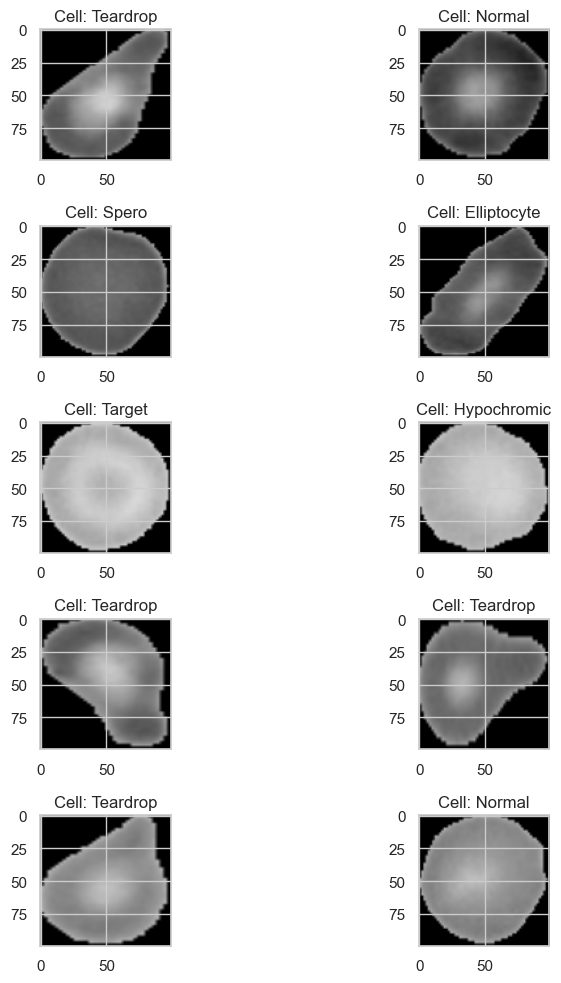

In [13]:
fig,ax=plt.subplots(5,2)
fig.set_size_inches(10,10)
for i in range(5):
    for j in range (2):
        l=rn.randint(0,len(Z))
        ax[i,j].imshow(X[l])
        ax[i,j].set_title('Cell: '+Z[l])

plt.tight_layout()

In [14]:
le=LabelEncoder()
Y=le.fit_transform(Z)
Y=to_categorical(Y,9)
X=np.array(X)
X=X/255

In [15]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [16]:
np.random.seed(42)
rn.seed(42)
tf.random.set_seed(42)

In [17]:
 # modelling starts using a CNN.

model = Sequential()
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same',activation ='relu', input_shape = (100,100,3)))
model.add(MaxPooling2D(pool_size=(2,2)))


model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))


model.add(Conv2D(filters =96, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model.add(Conv2D(filters = 96, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dense(9, activation = "softmax"))

In [18]:
batch_size=64
epochs=15

from keras.callbacks import ReduceLROnPlateau
red_lr= ReduceLROnPlateau(monitor='val_acc',patience=3,verbose=1,factor=0.1)

In [19]:
# Definisikan ImageDataGenerator dengan berbagai parameter augmentasi
datagen = ImageDataGenerator(
    featurewise_center=False,             # Atur rata-rata input menjadi 0 pada seluruh dataset
    samplewise_center=False,              # Atur rata-rata masing-masing sampel menjadi 0
    featurewise_std_normalization=False,  # Bagi input dengan deviasi standar dari dataset, per fitur
    samplewise_std_normalization=False,   # Bagi setiap input dengan deviasi standarnya
    zca_whitening=False,                  # Terapkan pemutihan ZCA
    rotation_range=10,                    # Putar gambar secara acak dalam rentang tertentu (derajat, 0 hingga 180)
    zoom_range=0.1,                       # Secara acak zoom pada gambar
    width_shift_range=0.2,                # Geser gambar secara acak secara horizontal (sebagai pecahan dari lebar total)
    height_shift_range=0.2,               # Geser gambar secara acak secara vertikal (sebagai pecahan dari tinggi total)
    horizontal_flip=True,                 # Secara acak balik gambar secara horizontal
    vertical_flip=False,                  # Secara acak balik gambar secara vertikal
    brightness_range=[0.5, 1.5],          # Atur rentang kecerahan
    shear_range=20,                       # Atur rentang geser
    channel_shift_range=50,               # Atur rentang pergeseran kanal
)

# Anggap x_train adalah dataset pelatihan Anda
datagen.fit(x_train)


In [20]:
model.compile(optimizer=Adam(lr=0.001),loss='categorical_crossentropy',metrics=['accuracy'])

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 100, 100, 32)      2432      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 50, 50, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 50, 50, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 25, 25, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 25, 25, 96)        55392     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 12, 12, 96)       0

In [22]:
History = model.fit_generator(datagen.flow(x_train,y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = (x_test,y_test),
                              verbose = 1, steps_per_epoch=x_train.shape[0] // batch_size)
model.fit(x_train,y_train,epochs=epochs,batch_size=batch_size,validation_data = (x_test,y_test))

Epoch 1/15
88/88 [==============================] - 90s 999ms/step - loss: 2.1713 - accuracy: 0.2910 - val_loss: 2.1513 - val_accuracy: 0.2489
Epoch 2/15
88/88 [==============================] - 72s 817ms/step - loss: 2.1245 - accuracy: 0.2951 - val_loss: 2.1105 - val_accuracy: 0.2630
Epoch 3/15
88/88 [==============================] - 70s 795ms/step - loss: 2.0848 - accuracy: 0.2949 - val_loss: 2.0760 - val_accuracy: 0.2679
Epoch 4/15
88/88 [==============================] - 70s 794ms/step - loss: 2.0513 - accuracy: 0.2960 - val_loss: 2.0480 - val_accuracy: 0.2736
Epoch 5/15
88/88 [==============================] - 73s 829ms/step - loss: 2.0229 - accuracy: 0.2958 - val_loss: 2.0244 - val_accuracy: 0.2764
Epoch 6/15
88/88 [==============================] - 71s 802ms/step - loss: 1.9997 - accuracy: 0.2949 - val_loss: 2.0051 - val_accuracy: 0.2792
Epoch 7/15
88/88 [==============================] - 70s 791ms/step - loss: 1.9799 - accuracy: 0.2949 - val_loss: 1.9890 - val_accuracy: 0.2792

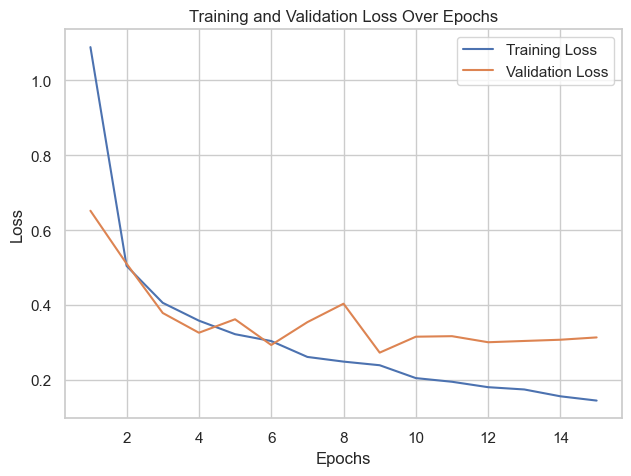

In [24]:
import matplotlib.pyplot as plt

# Ambil nilai loss dan val loss dari setiap epoch
train_loss = [1.0892, 0.5042, 0.4055, 0.3578, 0.3216, 0.3033, 0.2608, 0.2483, 0.2386, 0.2042, 0.1944, 0.1799, 0.1738, 0.1555, 0.1441]
val_loss = [0.6517, 0.5101, 0.3783, 0.3255, 0.3615, 0.2927, 0.3538, 0.4031, 0.2723, 0.3149, 0.3163, 0.3001, 0.3035, 0.3068, 0.3130]

# Buat grafik
epochs_range = range(1, len(train_loss) + 1)

plt.plot(epochs_range, train_loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss Over Epochs')
plt.legend()
plt.show()


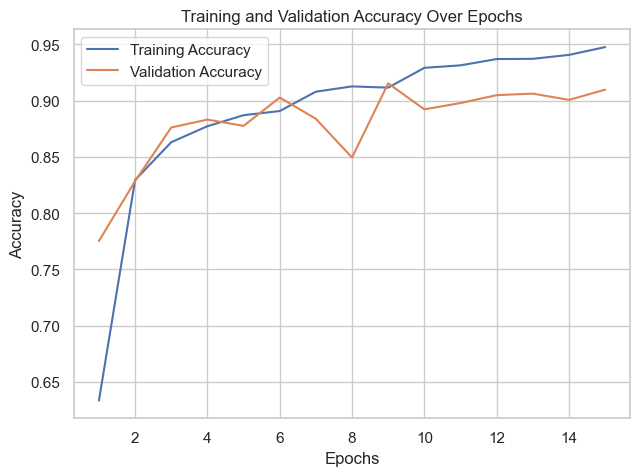

In [25]:
import matplotlib.pyplot as plt

# Ambil nilai akurasi dan val_accuracy dari setiap epoch
train_accuracy = [0.6334, 0.8294, 0.8630, 0.8772, 0.8870, 0.8907, 0.9079, 0.9126, 0.9115, 0.9291, 0.9313, 0.9369, 0.9371, 0.9406, 0.9475]
val_accuracy = [0.7752, 0.8284, 0.8761, 0.8831, 0.8775, 0.9027, 0.8838, 0.8494, 0.9153, 0.8922, 0.8978, 0.9048, 0.9062, 0.9006, 0.9097]

# Buat grafik akurasi dan val_accuracy
epochs_range = range(1, len(train_accuracy) + 1)

plt.plot(epochs_range, train_accuracy, label='Training Accuracy')
plt.plot(epochs_range, val_accuracy, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy Over Epochs')
plt.legend()
plt.show()


In [23]:
# Save the model to an HDF5 file
model.save("D:/RBC Thalassemia/model_thalassemia.h5")

In [26]:
# getting predictions on val set.
pred=model.predict(x_test)
pred_digits=np.argmax(pred,axis=1)

45/45 [==============================] - 5s 95ms/step


In [27]:
pred_digits

array([8, 8, 8, ..., 8, 7, 0], dtype=int64)

In [28]:
# now storing some properly as well as misclassified indexes'.
i=0
prop_class=[]
mis_class=[]

for i in range(len(y_test)):
    if(np.argmax(y_test[i])==pred_digits[i]):
        prop_class.append(i)
    if(len(prop_class)==8):
        break

i=0
for i in range(len(y_test)):
    if(not np.argmax(y_test[i])==pred_digits[i]):
        mis_class.append(i)
    if(len(mis_class)==8):
        break

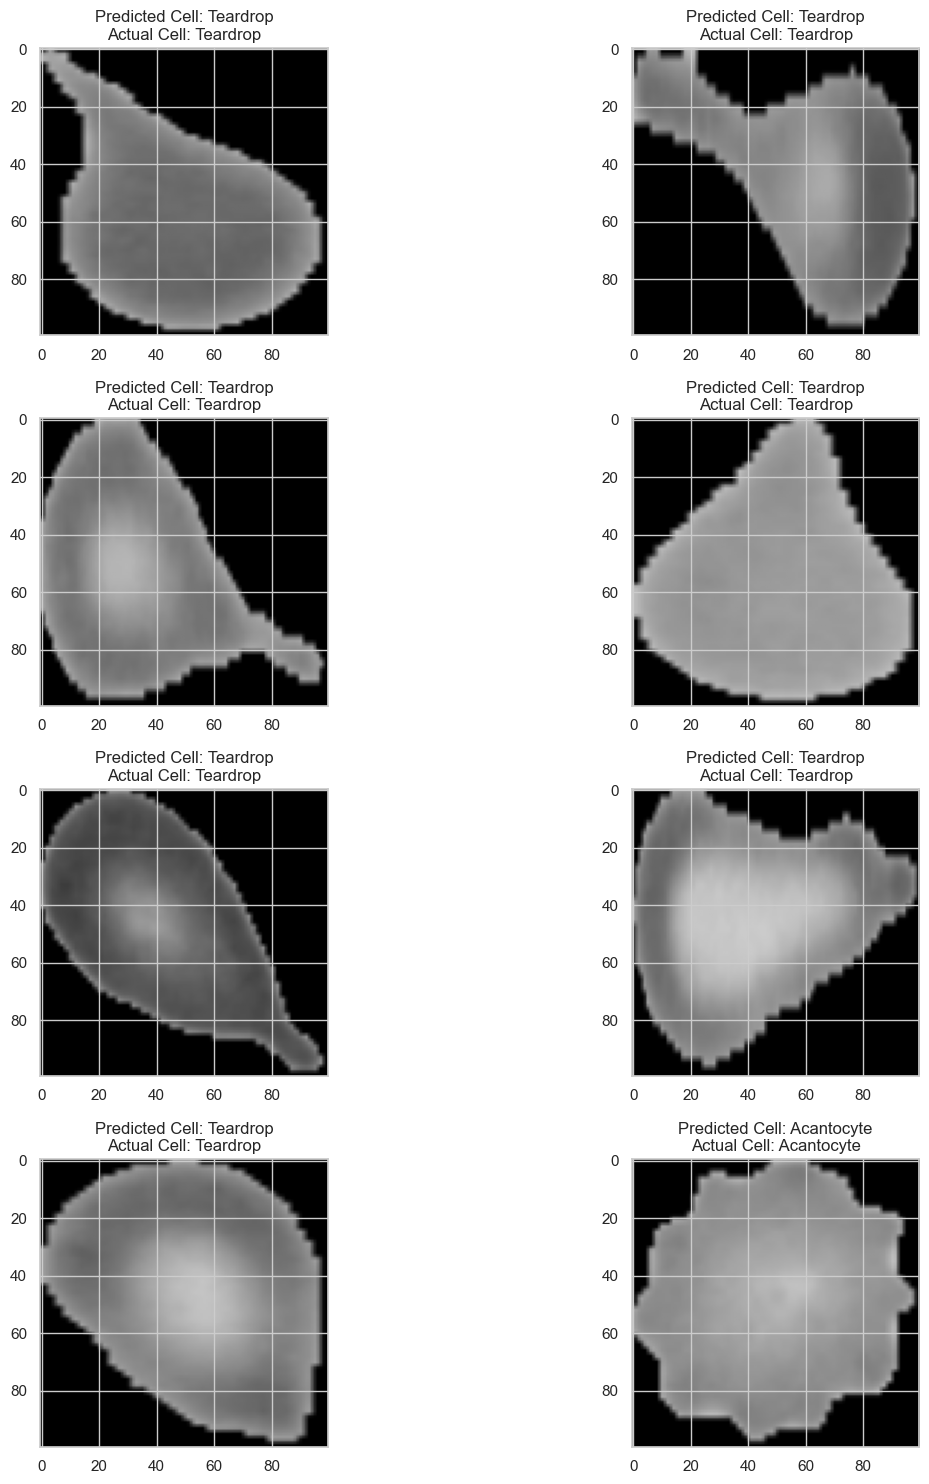

In [29]:
import warnings
import matplotlib.pyplot as plt

warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

count = 0
fig, ax = plt.subplots(4, 2)
fig.set_size_inches(15, 15)

for i in range(4):
    for j in range(2):
        index = prop_class[count]
        ax[i, j].imshow(x_test[index])

        # Ubah prediksi dan label aktual menjadi 1D array
        predicted_label = le.inverse_transform([pred_digits[index]])[0]
        actual_label = le.inverse_transform([np.argmax(y_test[index])])[0]

        ax[i, j].set_title("Predicted Cell: " + predicted_label + "\nActual Cell: " + actual_label)

        count += 1

plt.tight_layout()
plt.show()


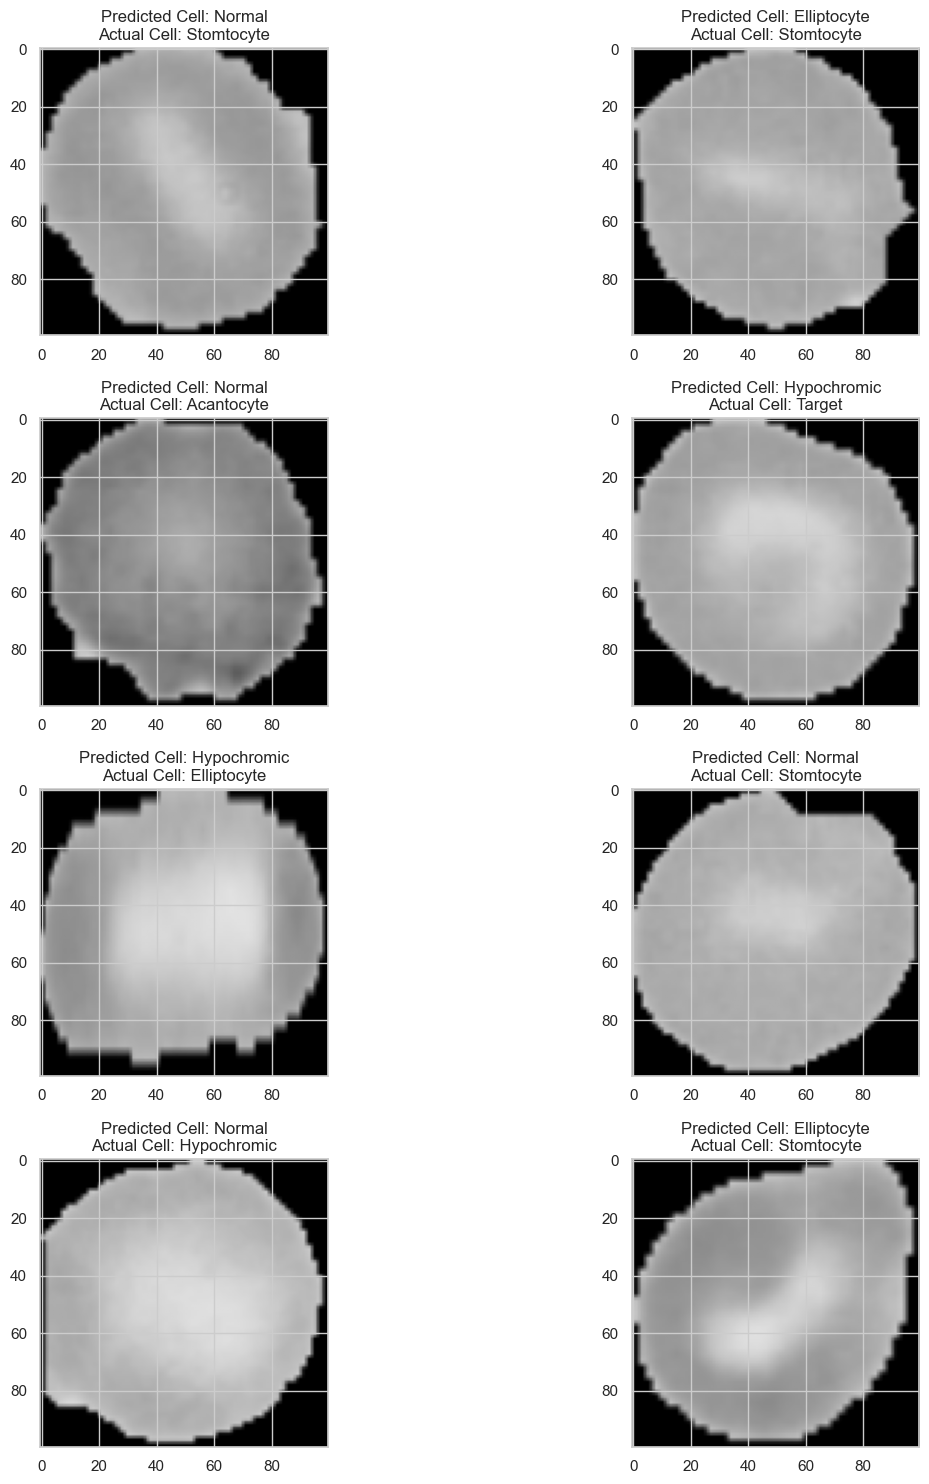

In [30]:
import warnings
import matplotlib.pyplot as plt

warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

count = 0
fig, ax = plt.subplots(4, 2)
fig.set_size_inches(15, 15)
for i in range(4):
    for j in range(2):
        index = mis_class[count]
        ax[i, j].imshow(x_test[index])

        # Extract predicted label and actual label as 1D arrays
        predicted_label = le.inverse_transform([pred_digits[index]])[0]
        actual_label = le.inverse_transform([np.argmax(y_test[index])])[0]

        ax[i, j].set_title("Predicted Cell: " + predicted_label + "\nActual Cell: " + actual_label)

        count += 1

plt.tight_layout()
plt.show()
